In [56]:
#2 Exercises
#The file proj4_params.json contains a JSON dictionary with parameters which will be used
#throughout the exercises. Load it.

In [57]:
#Improtowanie bibliotek i funkcji
import pandas as pd
import json #obsługa formatu json
import geopandas as gpd # praca z danymi geoprzestrzennymi
import osmnx as ox # OSMnx - narzędzie do pobierania, konstruowania i analizy danych z OpenStreetMap (OSM).
import contextily as ctx # Contextily - dodawanie map tła do wykresów geoprzestrzennych generowanych w matplotlib lub geopandas.

In [64]:
#2 Exercises
#The file proj4_params.json contains a JSON dictionary with parameters which will be used
#throughout the exercises. Load it. Each point has a unique identifier in a columns specified by the id_column parameter loaded from
#the JSON file above (in the example dataset, it is lamp_id).

In [81]:
with open("proj4_params.json") as file:
    data = json.load(file)
    id_column = data["id_column"]
print(f"Identyfiaktor kolumny: {id_column}")

Identyfiaktor kolumny: lamp_id


In [70]:
#Load a set of points from a GeoJSON file called proj4_points.geojson. The points will always
#be located somewhere in Poland

In [71]:
set_of_points = gpd.read_file("proj4_points.geojson") #Wczytywanie danych z pliku GeoJSON
set_of_points.to_crs(epsg=2180, inplace=True) #Przekształcenie współrzędnych do nowego układu odniesienia

In [ ]:
#For each point, count the number of points (including the point itself) that are within 100 metres
#of that point. For instance, if the points represents street lamps, count the number of lamps that
#are within 100 metres of each lamp (including the lamp itself).

#Note that while it would theoretically be possible to iterate over the dataset and find neighbours of
#each point separately, such approach would be very inefficient.

In [82]:
# Utworzenie indeksu przestrzennego dla szybszych zapytań
spacial_index = set_of_points.sindex 
# Tworzenie buforów wokół punktów o promieniu 100 jednostek
set_of_points['buffer_geom'] = set_of_points.geometry.buffer(100)

# Wykonanie przestrzennego połączenia (join) między punktami a ich buforami
df_joins = gpd.sjoin(
    set_of_points[[id_column, 'geometry']],
    set_of_points.set_geometry('buffer_geom'),
)

# Zmiana nazwy kolumny identyfikatora po lewej stronie wynikowego połączenia
df_joins.rename(columns={f'{id_column}_left': id_column}, inplace=True)

# Obliczenie liczby punktów znajdujących się w każdym buforze
counts = df_joins.groupby(id_column).count()
counts = counts.reset_index()
counts = counts[[id_column, "index_right"]]
counts.columns = [id_column, "count"]

In [83]:
#Save the results to a file called proj4_ex01_counts.csv, with two columns: działa dobrze 
counts[[id_column, "count"]].to_csv("proj4_ex01_counts.csv", index=False)

In [85]:
set_of_points2 = geo_points.to_crs(epsg=4326)
set_of_points2['lon'] = geo_point2_1.geometry.x
set_of_points2['lat'] = geo_point2_1.geometry.y

In [86]:
#Now save the latitude and longitude of all points to a CSV file called proj4_ex01_coords.csv,
#with the following columns:
set_of_points2[[id_column, "lon", "lat"]].to_csv("proj4_ex01_coords.csv", index=False)

In [87]:
#2.2 Exercise 2: Loading data from OpenStreetMap

In [95]:
# Wybór nazwy miasta na podstawie danych z pliku
city = data["city"]
city = "Kraków" if city == "Cracow" else ('Warszawa' if city == "Warsaw" else city)

# Pobranie grafu ulicznego (sieci drogowej) dla wybranego miasta
G = ox.graph_from_place(f"{city}, Poland", network_type="drive", custom_filter='["highway"="primary"]')

# Konwersja grafu ulicznego do ramki danych geoprzestrzennych (GeoDataFrame)
geo_data_frame = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Zmiana nazw kolumn w ramce danych geoprzestrzennych
geo_data_frame = geo_data_frame.rename(columns={"osmid": "osm_id"})

# Wybór określonych kolumn w ramce danych geoprzestrzennych
geo_data_frame = geo_data_frame[["osm_id", "name", "geometry"]]

# Konwersja typów danych kolumny 'osm_id' i 'name' na typ str (łańcuch znaków)
geo_data_frame["osm_id"] = geo_data_frame["osm_id"].astype(str)
geo_data_frame["name"] = geo_data_frame["name"].astype(str)




In [96]:
#Save it to proj4_ex02_roads.geojson.
geo_data_frame.to_file("proj4_ex02_roads.geojson", driver="GeoJSON", index=False)
geo_data_frame

osm_id  \
u           v           key                                                      
13823459    4232232955  0           [37831088, 24905014, 444150756, 905181438]   
13823461    13823459    0                                            157627309   
            206368891   0          [157627315, 217138564, 217138566, 37831087]   
32063271    32063274    0          [148469691, 549215957, 148469686, 37828103]   
32063274    32063411    0                                [37828104, 549215953]   
            213636363   0    [932235205, 216231369, 453609840, 1087324497, ...   
32063403    206368892   0    [732685222, 148469610, 19801868, 148469617, 54...   
            32063271    0                                [549215955, 19801869]   
32063411    32063403    0          [148469690, 549215954, 37828098, 148469692]   
32063423    213635848   0                     [148978816, 37828097, 148978817]   
34806225    11228036615 0                     [73306216, 813408229, 813408230]   
206343893   1406349435  0    [577525954, 218430083, 118202437, 577525941, 5...   
            206343915   0                                            152056459   
206343915   206343920   0                                            157868828   
206343920   1406360100  0                                             37830030   
            1479314145  0          [81942097, 218427508, 218427525, 435099053]   
206368891   206368892   0                                             37828102   
            32063271    0    [148469607, 545433850, 148469613, 148469615, 4...   
206368892   13823459    0                                [37828099, 217138565]   
213635848   32063411    0    [216231365, 216686693, 1204369448, 1204369449,...   
            213636363   0                                             29597187   
213636363   213636697   0                     [37828105, 148978818, 148978819]   
213636697   1479314139  0    [29318152, 714458121, 714458120, 21920782, 270...   
            32063423    0                                             37828106   
1358198435  206343915   0    [218431648, 218430081, 137191202, 218430082, 7...   
            1479314145  0         [119030552, 137191203, 152056443, 970678564]   
1406360100  206343893   0                                            157868827   
            8587913216  0    [922219779, 932969359, 6227984, 235654809, 235...   
1479314139  1406349435  0         [137191206, 970678563, 157868812, 119030550]   
            1406360100  0    [137191201, 218427521, 865146659, 218427523, 7...   
1479314145  32063423    0    [29318144, 27090946, 27090949, 714458119, 7144...   
1541292462  11228036612 0    [1091208960, 391115780, 690233477, 391115781, ...   
            1541292515  0                                            405498220   
1541292515  1542271684  0                                            405498226   
1542271684  13823461    0    [537125259, 378869525, 907848859, 1267988894, ...   
            1542271716  0                                            405498225   
1542271716  1541292462  0                                            405498228   
4232232955  13823461    0                                             19803388   
            1542271716  0    [37828101, 1156788934, 1156788935, 913838151, ...   
5940565238  11228036614 0                               [462328002, 813408239]   
8587913211  8587920218  0                 [1040636281, 1040636282, 1040636285]   
8587913213  8587913211  0                                           1040636280   
8587913216  8587913213  0                             [1040636283, 1040636284]   
8587920218  8587913216  0                                            925346427   
            206343893   0    [847728538, 235654811, 235654813, 235654814, 1...   
11228036612 11228036615 0                                            813408237   
            34806225    0                               [797812628, 173295820]   
11228036613 1541292515  0    [1122699141, 1080474630, 

In [97]:
#2.3 Exercise 3: Spatial joins

In [ ]:
#For each of the roads obtained in Exercise 2, count the number of points, loaded in Exercise 1, that
#are within 50 metres of the line representing the axis of the road

In [103]:
# Wczytanie danych punktowych z pliku GeoJSON i przekształcenie do układu EPSG 2180
points = gpd.read_file("proj4_points.geojson")
points = points.to_crs(epsg=2180)

# Przypisanie danych dróg do zmiennej roads
roads = geo_data_frame

# Iteracja po danych dróg
for road in roads.itertuples():
    # Obliczenie bounding box dla bufora 50-metrowego wokół drogi
    box_50m = road.geometry.buffer(50).bounds
    
    # Znalezienie kandydatów na punkty wewnątrz lub w pobliżu bounding box
    candidates = points.sindex.intersection(box_50m)
    
    # Filtrowanie kandydatów na podstawie rzeczywistej odległości
    neighbours = points.loc[candidates].distance(road.geometry) <= 50
    
    # Zliczanie liczby punktów wewnątrz lub w pobliżu 50 metrów od drogi
    roads.loc[road.Index, "count"] = neighbours.count()

# Grupowanie wyników po nazwie drogi i zliczanie liczby punktów dla każdej drogi
roads = roads.groupby("name").count()
roads = roads[["count"]]

# Zmiana nazw kolumny z wynikami zliczania na "point_count" dla jasności
roads = roads.rename(columns={"count": "point_count"})


In [104]:
#Save the results to a CSV file called proj4_ex03_streets_points.csv, with the following columns:
#• name, with the name of the street,
#• point_count, with the number of points within 50 metres of that street.
roads.to_csv("proj4_ex03_streets_points.csv")

In [105]:
#2.4 Exercise 4: Drawing maps

      name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

C:\Users\Michał\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
C:\Users\Michał\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
C:\Users\Michał\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
C:\Users\Michał\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
C:\Users\Michał\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\til

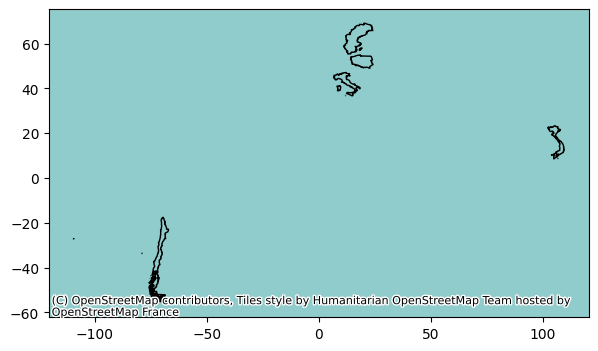

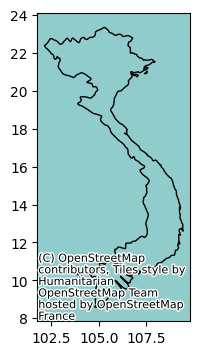

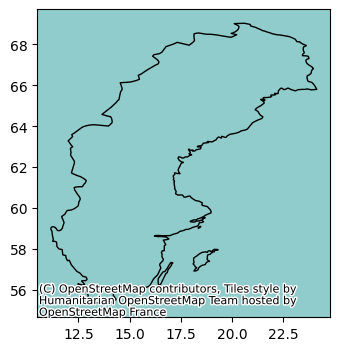

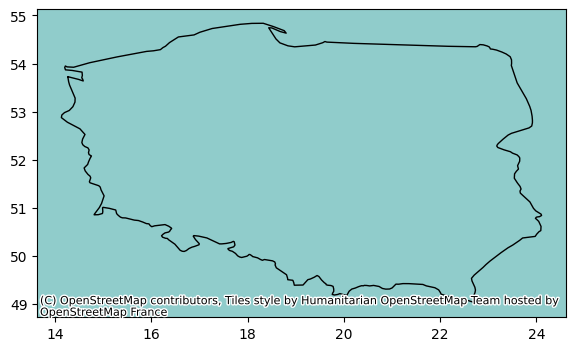

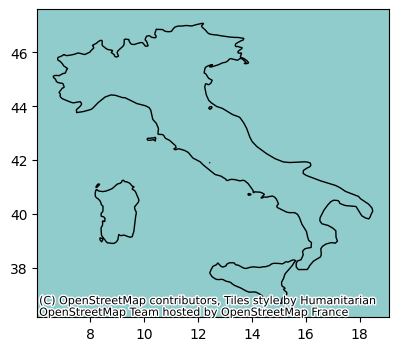

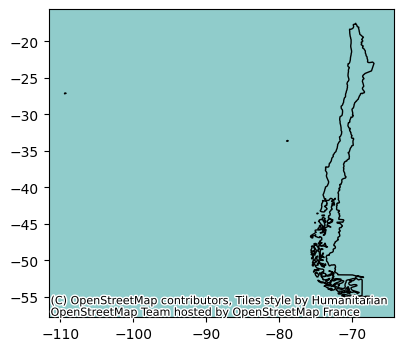

In [110]:
# Wczytanie danych geoprzestrzennych (kraje) z pliku GeoJSON
gdf = gpd.read_file("proj4_countries.geojson")

# Wyświetlenie ramki danych geoprzestrzennych jako tekst
print(gdf.to_string())

# Zapisanie ramki danych do pliku formatu pickle
gdf.to_pickle("proj4_ex04_gdf.pkl")

# Wyświetlenie wszystkich krajów na mapie świata
ax = gdf.plot(edgecolor="black", facecolor="none", figsize=(8, 4))
ctx.add_basemap(ax)

# Iteracja po nazwach krajów w ramce danych
for country in gdf["name"]:
    # Wybór danych dla danego kraju
    gdf_country = gdf[gdf["name"] == country]
 
    # Wyświetlenie granicy kraju z tłem mapy
    ax = gdf_country.plot(edgecolor="black", facecolor="none", figsize=(8, 4))
    ctx.add_basemap(ax)
 
    # Zapisanie obrazu do pliku PNG dla każdego kraju
    plt.savefig(f"proj4_ex04_{country.lower()}.png")

In [38]:
#As usual, commit your program to your GitLab project repository. Save it as project04/project04.py.
